In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from correlation_graph import show_correlation_graph
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [2]:
df = pd.read_csv("./dataset/phishing_website_data.csv") 
df

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [3]:
df.describe()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [58]:
df.URL_of_Anchor.value_counts()

 0    5337
-1    3282
 1    2436
Name: URL_of_Anchor, dtype: int64

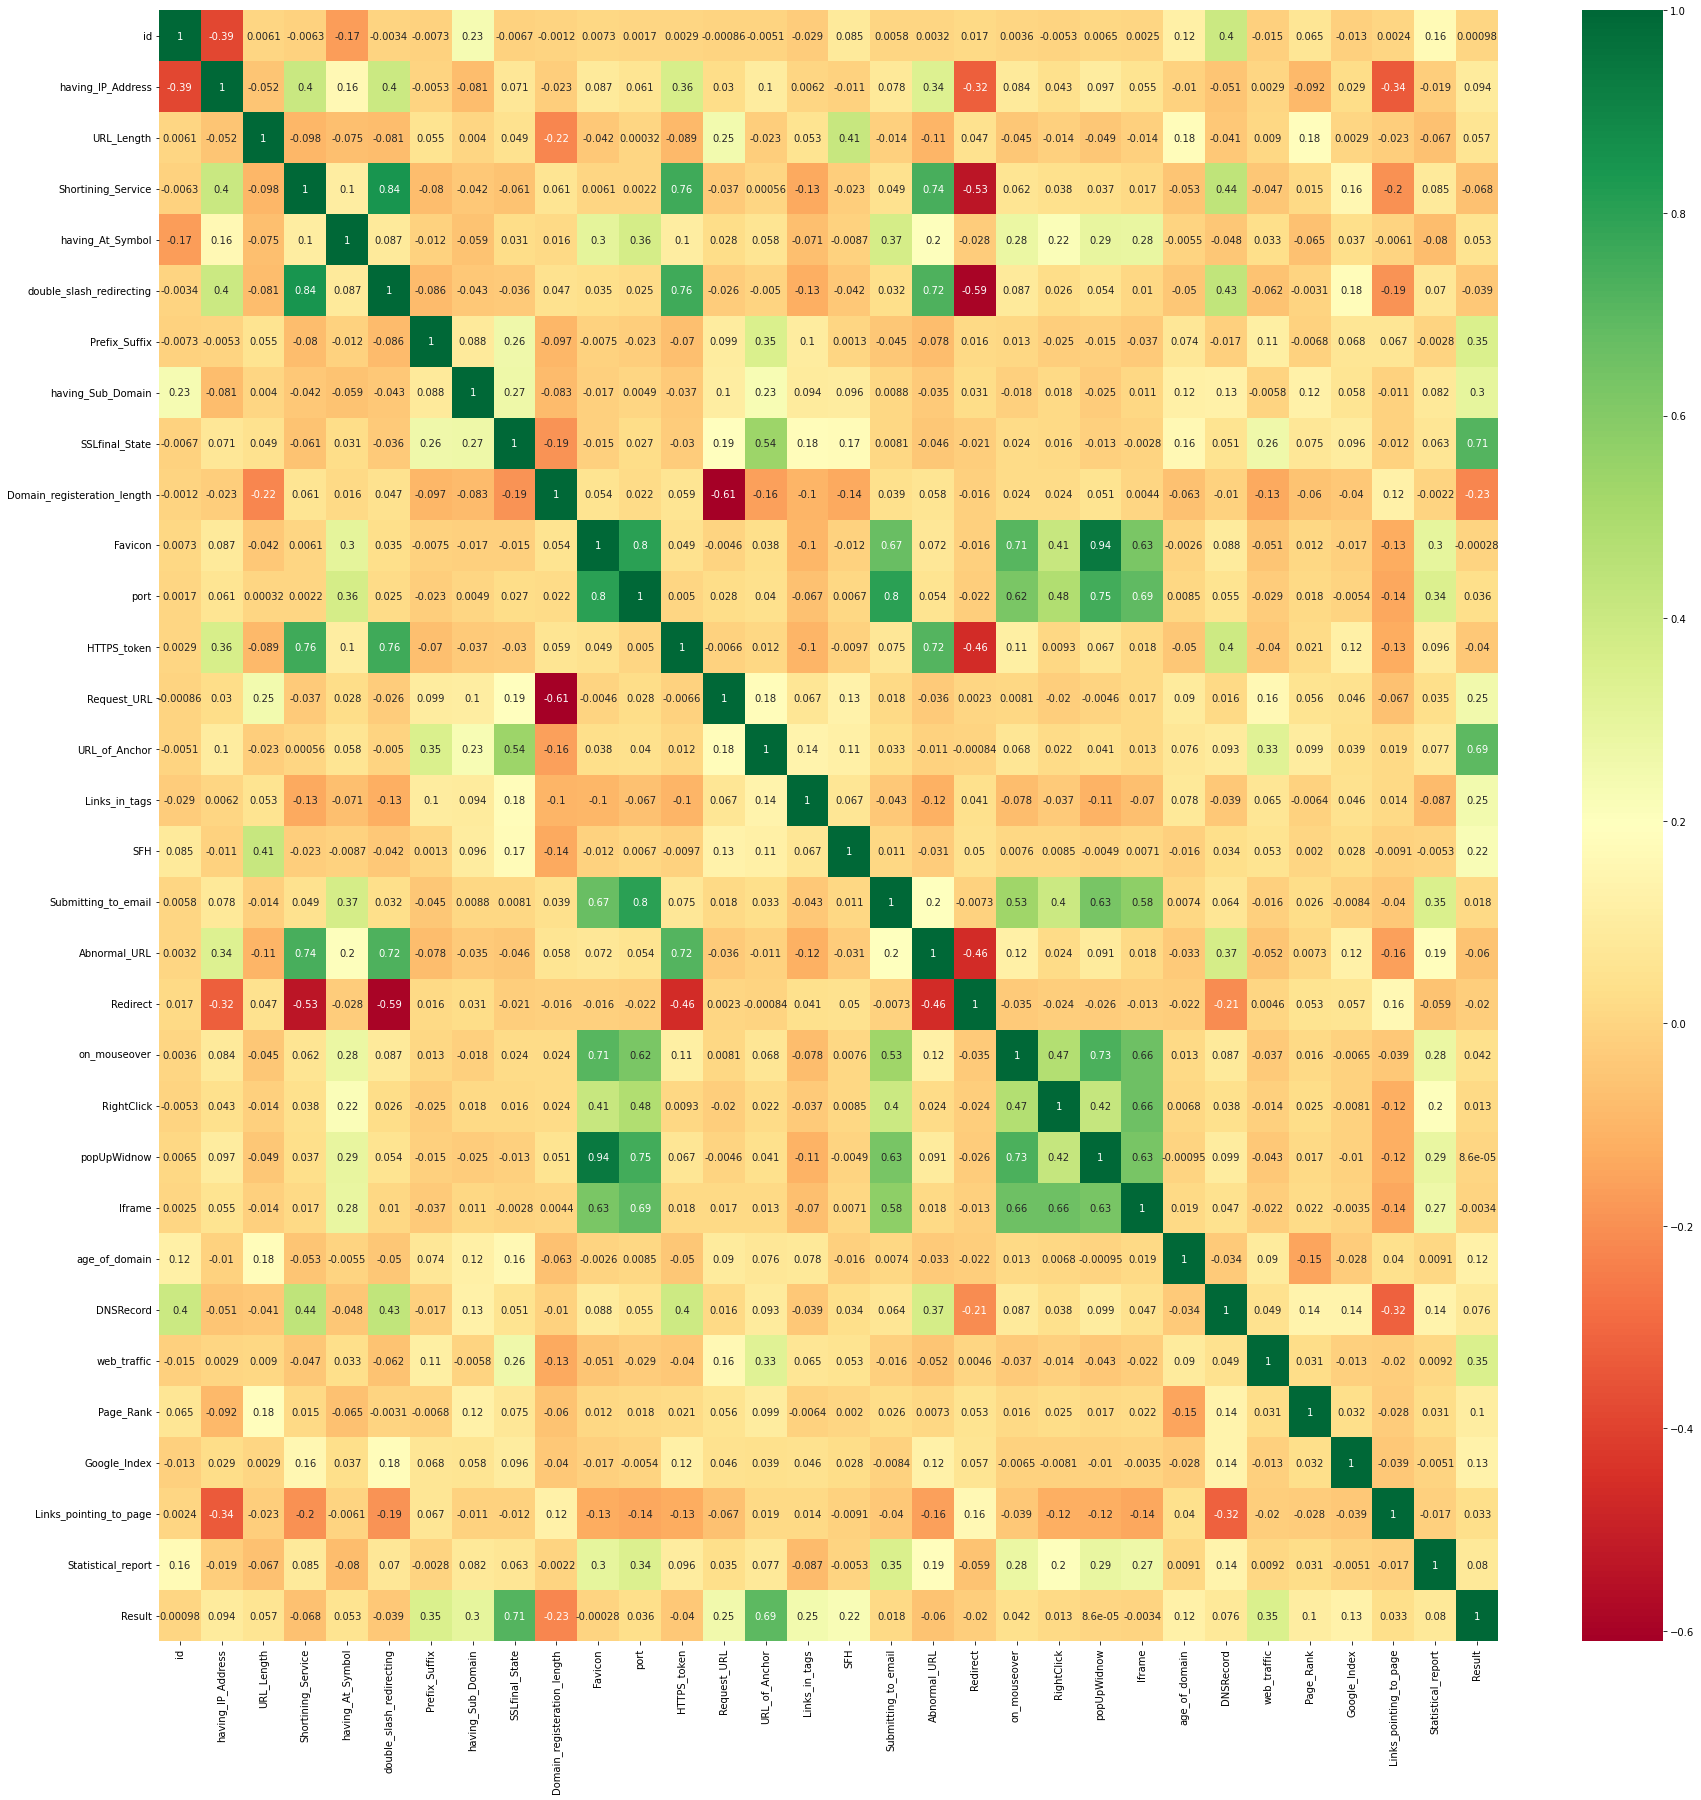

In [6]:
show_correlation_graph(df, (30, 30))

In [3]:
X = df[["SSLfinal_State", "URL_of_Anchor", "web_traffic", "Prefix_Suffix"]]
Y = df[["Result"]]
print(X, Y)

       SSLfinal_State  URL_of_Anchor  web_traffic  Prefix_Suffix
0                  -1             -1           -1             -1
1                   1              0            0             -1
2                  -1              0            1             -1
3                  -1              0            1             -1
4                   1              0            0             -1
...               ...            ...          ...            ...
11050               1              1           -1              1
11051              -1             -1            1             -1
11052              -1              0            1             -1
11053              -1             -1            1             -1
11054              -1             -1           -1             -1

[11055 rows x 4 columns]        Result
0          -1
1          -1
2          -1
3          -1
4           1
...       ...
11050       1
11051      -1
11052      -1
11053      -1
11054      -1

[11055 rows x 1 columns]


In [4]:
Y.value_counts()

Result
 1        6157
-1        4898
dtype: int64

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [6]:
C = 1.0
svc = SVC(kernel='linear', C=C)
svc.fit(x_train, y_train.values.ravel())
y_pred_linear = svc.predict(x_test)

In [7]:
print(f"Accuracy score using linear kernel: {accuracy_score(y_test, y_pred_linear)}")

Accuracy score using linear kernel: 0.9059391015978293


In [22]:
rbf_svc = SVC(C=C)
rbf_svc.fit(x_train, y_train.values.ravel())
y_pred_rbf = rbf_svc.predict(x_test)

In [23]:
print(f"Accuracy score using RBF kernel: {accuracy_score(y_test, y_pred_rbf)}")

Accuracy score using RBF kernel: 0.9155863732288212


In [10]:
poly_svc = SVC(kernel="poly", degree=3, C=C)
poly_svc.fit(x_train, y_train.values.ravel())
y_pred_poly = poly_svc.predict(x_test)

In [11]:
print(f"Accuracy score using polynomial kernel: {accuracy_score(y_test, y_pred_poly)}")

Accuracy score using polynomial kernel: 0.9155863732288212


In [12]:
crime_df = pd.read_csv("./dataset/communities.data.csv")
crime_df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [14]:
crime_df = crime_df.replace({"?":np.nan})
crime_df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [15]:
crime_df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
crime_df.isnull()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
2,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
1990,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
1991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
clean_crime_df = crime_df.dropna(axis=1)
clean_crime_df

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,6,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,9,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,25,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


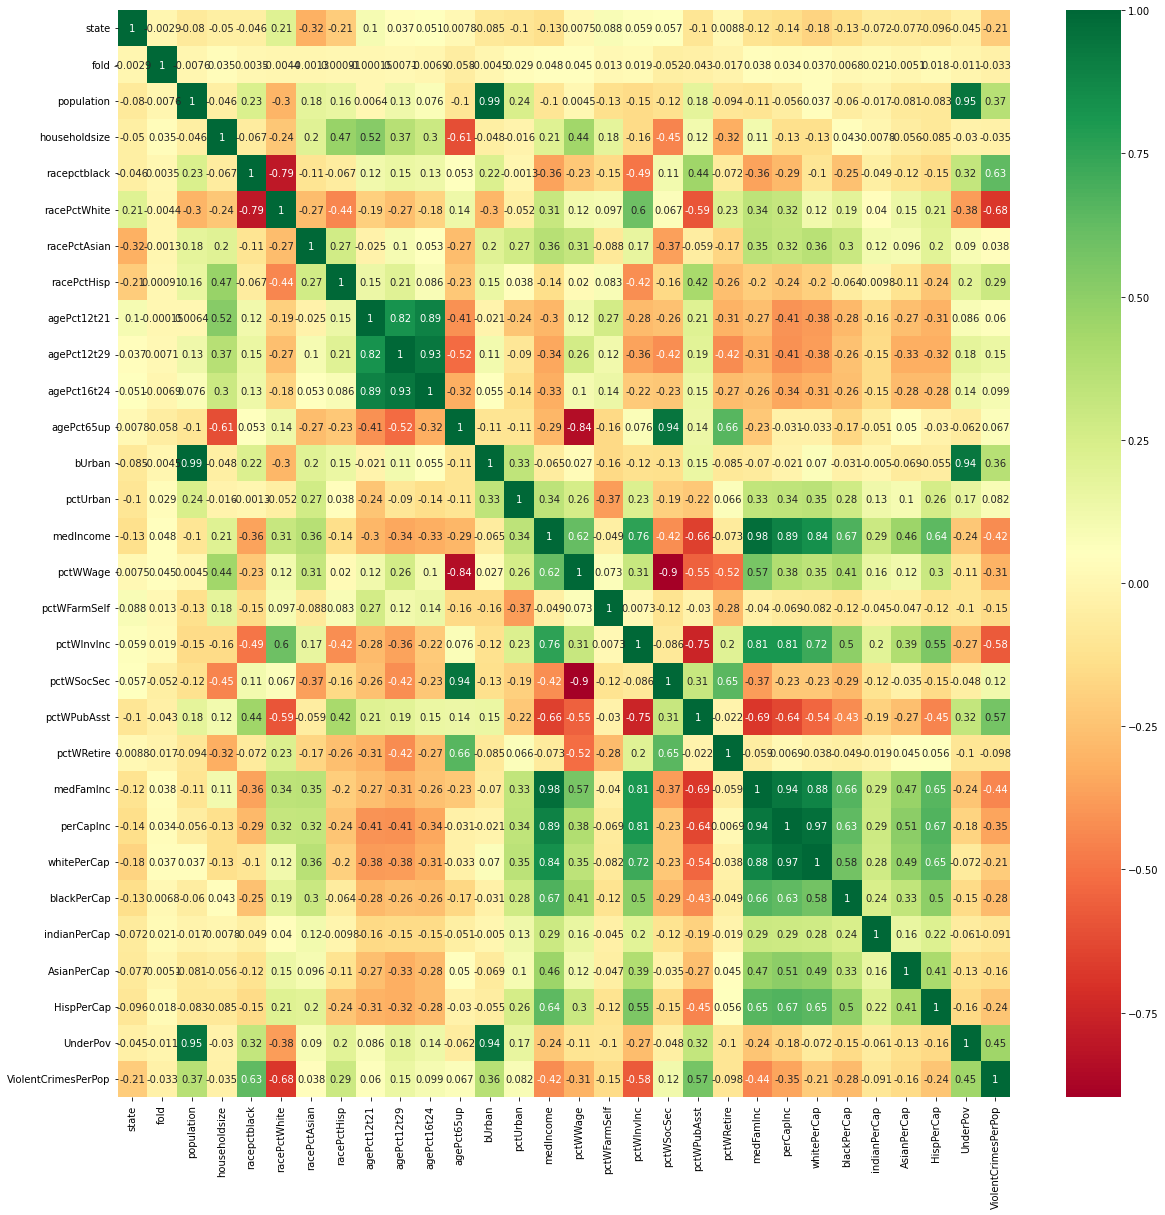

In [63]:
cols = list(range(0, 30))
cols.append(102)
show_correlation_graph(clean_crime_df.iloc[:,cols], (20, 20))

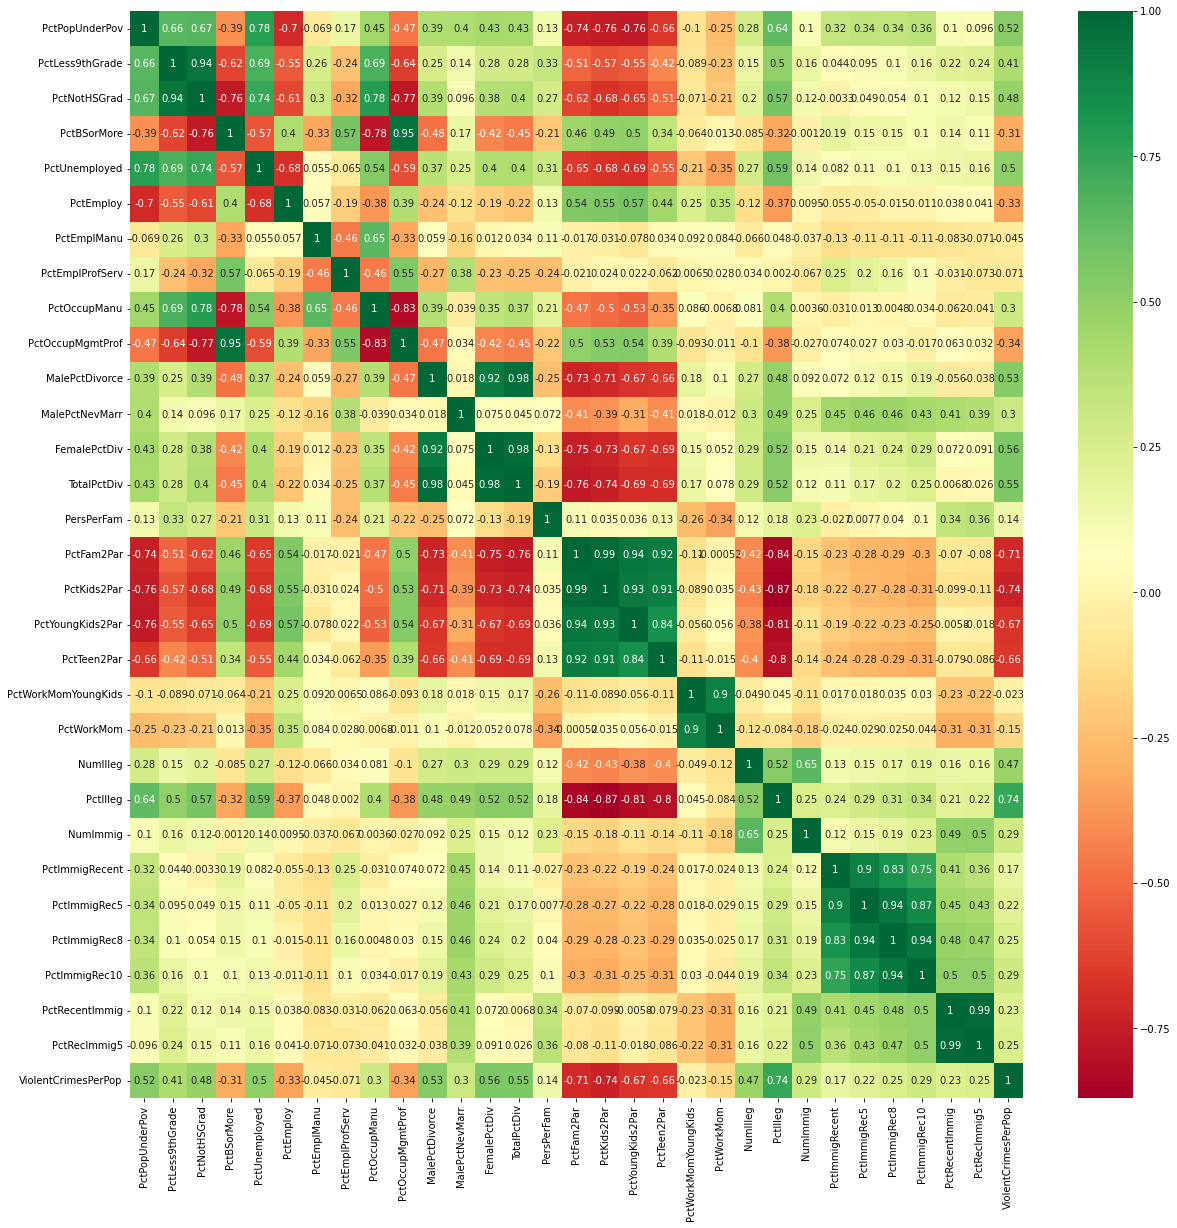

In [64]:
cols = list(range(30, 60))
cols.append(102)
show_correlation_graph(clean_crime_df.iloc[:,cols], (20, 20))

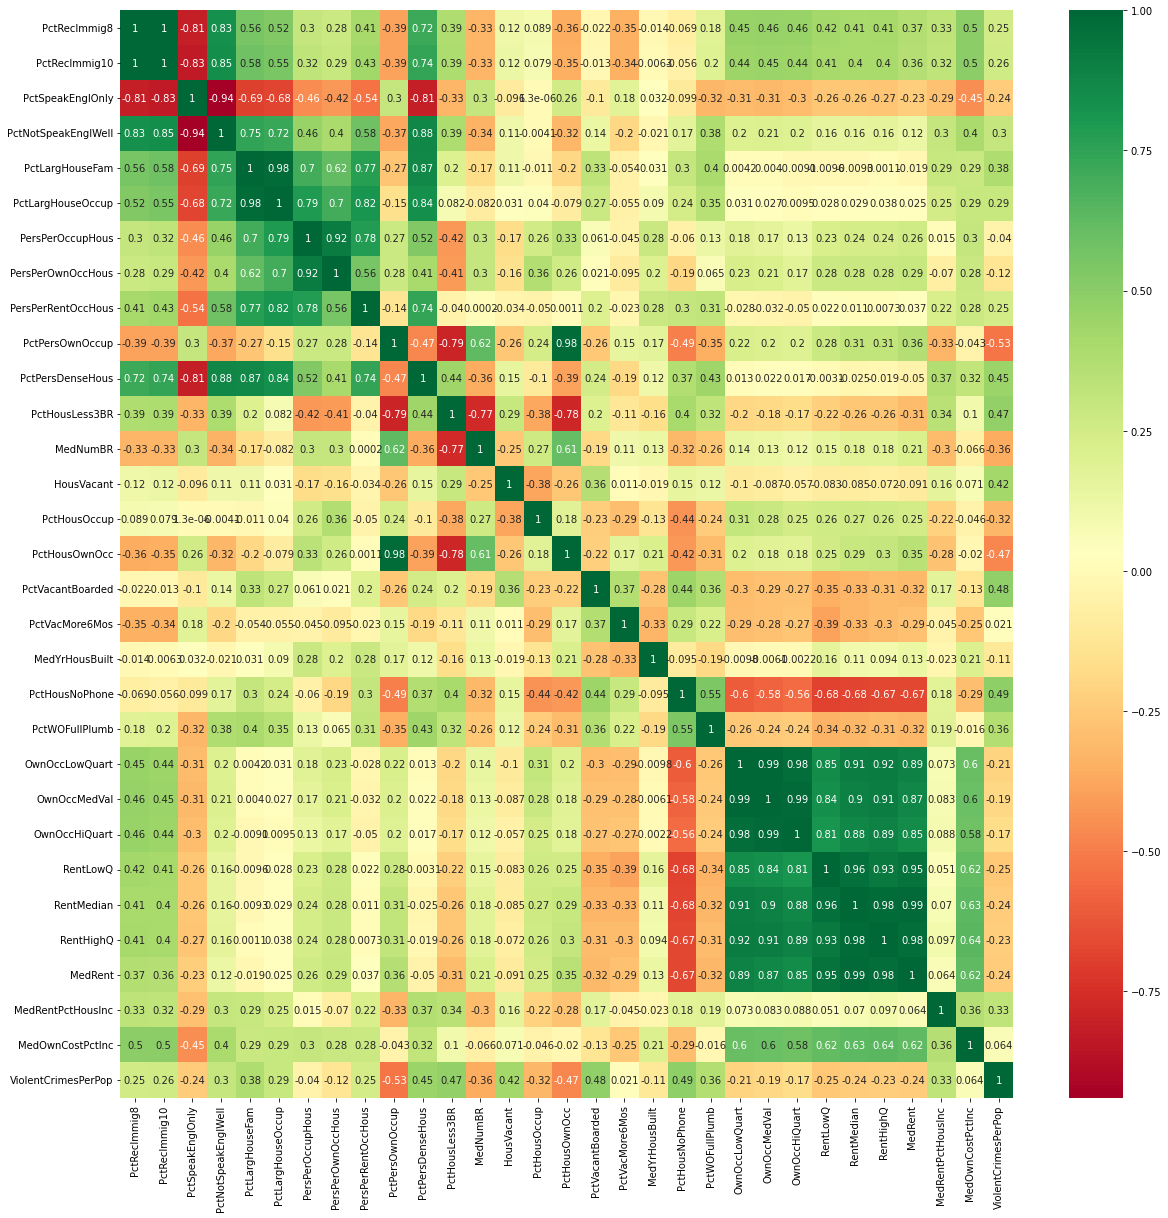

In [65]:
cols = list(range(60, 90))
cols.append(102)
show_correlation_graph(clean_crime_df.iloc[:,cols], (20, 20))

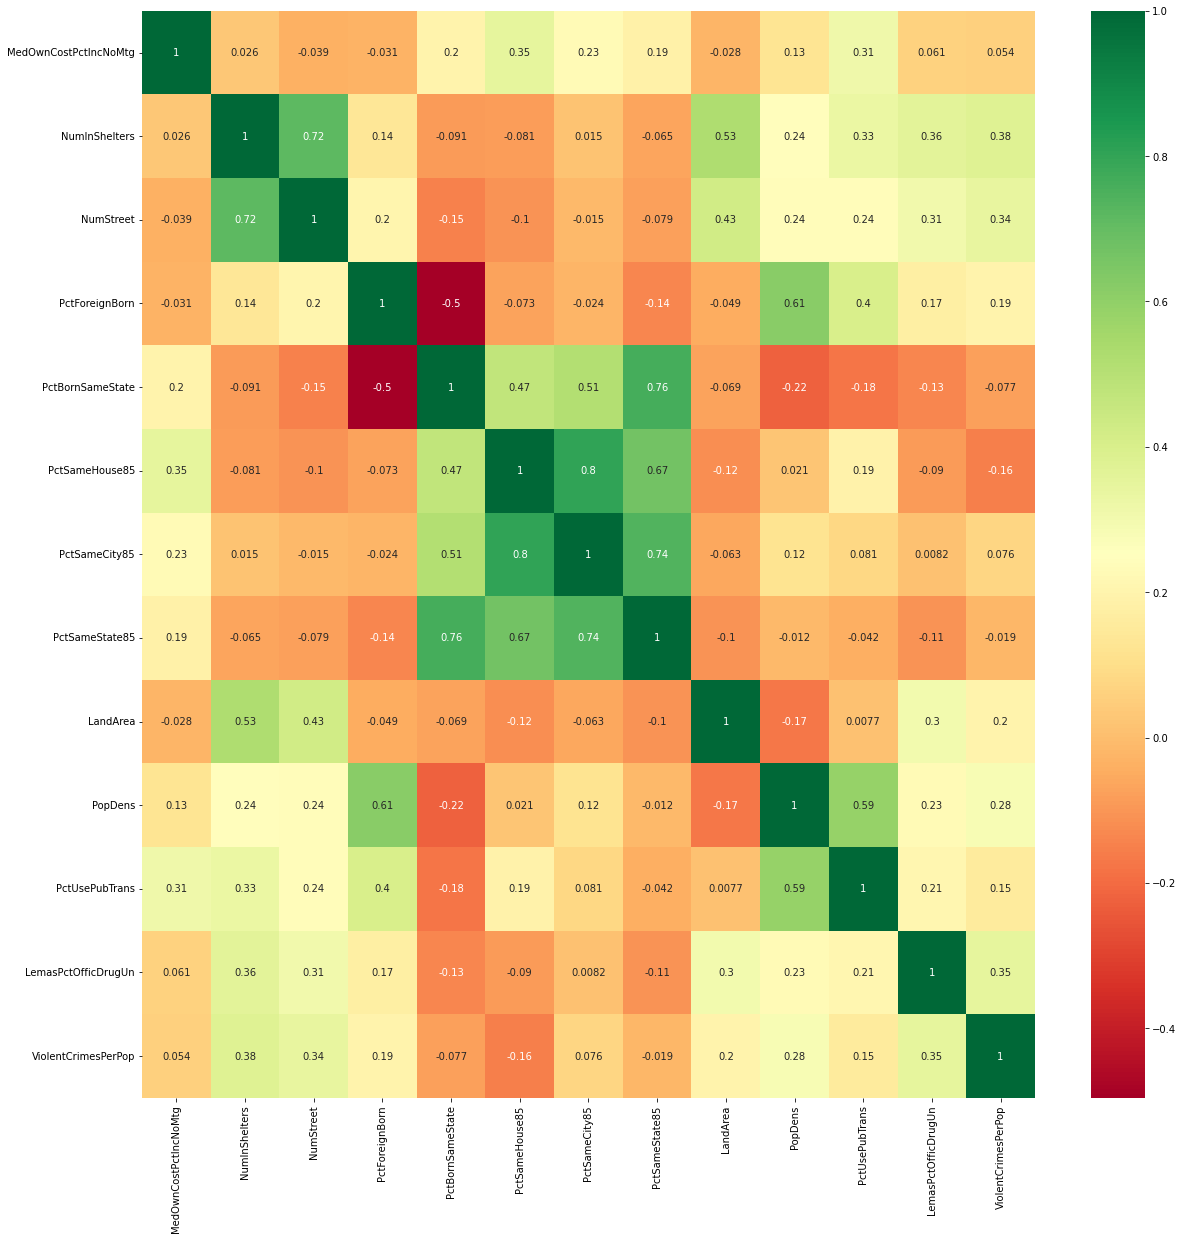

In [66]:
cols = list(range(90, 103))
# cols.append(102)
show_correlation_graph(clean_crime_df.iloc[:,cols], (20, 20))

In [3]:
cpi_df = pd.read_csv("./dataset/All_India_Index_july2019_20Aug2020.csv")
cpi_df = cpi_df[(cpi_df.Year != 2020)]
cpi_df = cpi_df.groupby(['Year'], as_index=False).mean()
cpi_df

,Year,Sno,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,2013,18.5,114.516667,113.969444,112.441667,108.302778,104.755556,108.827778,135.338889,106.275000,...,105.608333,108.544444,108.005556,106.766667,106.666667,105.916667,107.688889,104.986111,106.763889,110.013889
1,2014,54.5,122.052778,122.383333,119.272222,119.861111,106.908333,124.766667,139.547222,113.197222,...,114.675000,113.355556,114.900000,112.497222,111.516667,111.877778,115.469444,109.144444,112.536111,117.327778
2,2015,90.5,124.105556,128.997222,119.633333,127.613889,110.563889,129.441667,144.155556,143.269444,...,120.158333,119.022222,121.013889,118.213889,111.158333,117.105556,123.108333,112.413889,116.416667,123.036111
3,2016,126.5,128.222222,137.863889,129.097222,132.513889,115.466667,132.975000,145.155556,172.258333,...,126.475000,122.575000,126.575000,123.900000,113.469444,122.247222,129.897222,119.513889,121.369444,129.100000
4,2017,162.5,133.841667,141.977778,131.600000,138.161111,118.130556,139.772222,144.694444,137.244444,...,133.675000,129.280556,131.694444,128.938889,117.430556,126.836111,136.186111,124.027778,126.200000,133.386111
5,2018,198.5,136.947222,146.611111,137.286111,141.761111,120.677778,146.819444,144.083333,121.080556,...,143.816667,138.297222,138.358333,137.005556,123.336111,133.355556,144.036111,129.850000,132.950000,138.669444
6,2019,233.0,140.109091,158.851515,141.524242,144.284848,122.542424,144.654545,165.324242,128.460606,...,150.763636,138.775758,144.136364,146.924242,125.787879,140.424242,153.742424,136.518182,139.372727,144.127273


c:\Users\Ishaan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


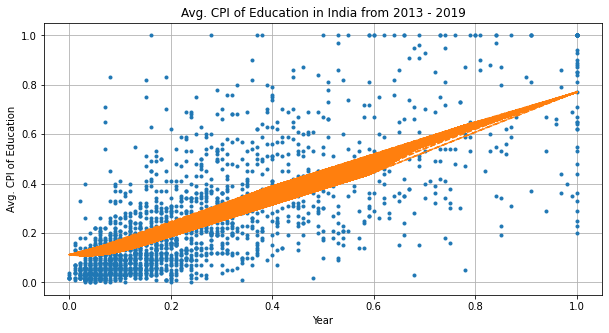

In [28]:
x = clean_crime_df.PctIlleg
x = [[i] for i in list(x)]
y = clean_crime_df.ViolentCrimesPerPop
y = [[i] for i in list(y)]

model = SVR(kernel='rbf', C=1.0)
model.fit(x, y)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x, y, '.')
plt.plot(x, model.predict(x), '--')
plt.xlabel('Year')
plt.ylabel('Avg. CPI of Education')
plt.title("Avg. CPI of Education in India from 2013 - 2019")
plt.grid(True)
plt.show()

In [29]:
y_fit = model.predict(x)
y_fit

array([0.14736718, 0.22682657, 0.40894273, ..., 0.41254907, 0.16727454,
       0.40351853])

In [27]:
y

[[0.2],
 [0.67],
 [0.43],
 [0.12],
 [0.03],
 [0.14],
 [0.03],
 [0.55],
 [0.53],
 [0.15],
 [0.24],
 [0.08],
 [0.06],
 [0.09],
 [0.21],
 [0.3],
 [0.49],
 [0.07],
 [0.15],
 [0.03],
 [0.34],
 [0.69],
 [0.21],
 [0.63],
 [0.31],
 [0.12],
 [0.84],
 [0.1],
 [0.49],
 [0.02],
 [0.16],
 [0.19],
 [0.15],
 [0.31],
 [0.08],
 [0.24],
 [0.11],
 [0.22],
 [0.13],
 [0.07],
 [0.11],
 [0.06],
 [0.8],
 [0.22],
 [0.17],
 [0.16],
 [0.2],
 [0.12],
 [0.11],
 [0.12],
 [0.2],
 [0.68],
 [0.23],
 [0.05],
 [0.1],
 [0.28],
 [0.22],
 [0.22],
 [0.55],
 [0.05],
 [0.03],
 [0.07],
 [0.07],
 [0.57],
 [0.37],
 [0.14],
 [0.61],
 [0.03],
 [0.5],
 [0.05],
 [0.04],
 [0.21],
 [0.05],
 [0.02],
 [0.14],
 [0.18],
 [0.12],
 [0.68],
 [0.7],
 [0.75],
 [0.3],
 [0.24],
 [1.0],
 [0.0],
 [0.03],
 [0.06],
 [0.08],
 [0.1],
 [0.27],
 [0.15],
 [0.63],
 [0.05],
 [0.03],
 [0.12],
 [0.4],
 [0.37],
 [0.45],
 [0.04],
 [0.09],
 [0.09],
 [0.39],
 [0.02],
 [0.34],
 [0.28],
 [0.08],
 [0.44],
 [0.24],
 [0.09],
 [0.26],
 [0.4],
 [0.56],
 [0.05],
 [0.06]

In [30]:
mean_squared_error(y, y_fit)

0.024757147279793813